In [3]:
import pandas as pd
# from powerbiclient import Report, models
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind


In [4]:
url = 'Q:\Operations\Industrial Engineering\Projects\Water Meter\Kill Daily Water Usage (Cubic Meters).csv'
file = 'Kill Daily Water Usage (Cubic Meters).csv'
url_may = 'Q:\Operations\Industrial Engineering\Projects\Water Meter\Daily Average Water Usage (Cubic Meters) May.csv'
file_may = 'Kill Daily Water Usage (Cubic Meters) May.csv'
df = pd.read_csv(url_may)
df

,Date,Average Daily Usage,TimeLine
0,8/2/2022,988.00,No Smart Valve
1,8/3/2022,1013.00,No Smart Valve
2,8/4/2022,1023.00,No Smart Valve
3,8/5/2022,1025.00,No Smart Valve
4,8/8/2022,985.00,No Smart Valve
...,...,...,...
196,4/27/2023,954.00,Smart Valve
197,4/28/2023,940.00,Smart Valve
198,Total,898.15,NaN
199,NaN,NaN,NaN


In [57]:
df.groupby('TimeLine', axis = 0).agg({'mean', 'count'})

C:\Users\msmetanin\AppData\Local\Temp\ipykernel_16220\1998012029.py:1: FutureWarning: ['Date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('TimeLine', axis = 0).agg({'mean', 'count'})


Average Daily Usage            
                             count        mean
TimeLine                                      
No Smart Valve                  78  932.358974
Smart Valve                    100  899.320000

In [6]:
df.groupby('TimeLine', axis = 0).describe()

Average Daily Usage                                       \
                             count       mean         std    min    25%   
TimeLine                                                                  
No Smart Valve                86.0  911.27907  172.155105  410.0  868.0   
Smart Valve                  112.0  888.06250   84.775728  432.0  867.5   

                                       
                  50%     75%     max  
TimeLine                               
No Smart Valve  906.5  967.75  1854.0  
Smart Valve     904.0  933.00  1008.0

In [23]:
no_smart_average = df.loc[df['TimeLine'] == 'No Smart Valve', 'Average Daily Usage'].mean()
no_smart_average


911.2790697674419

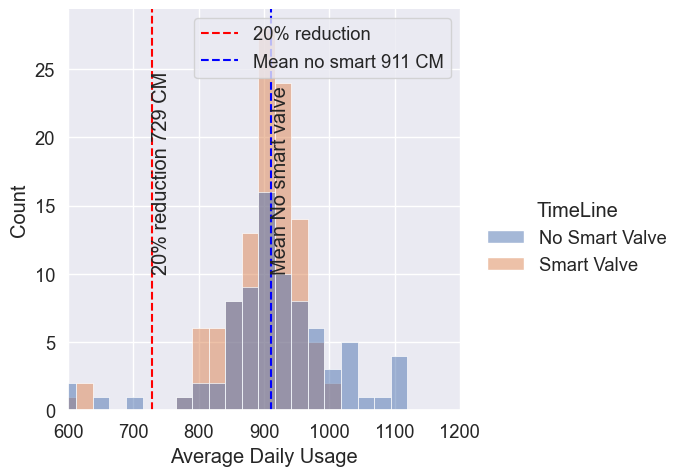

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
sns.displot(df, x='Average Daily Usage', hue='TimeLine')

sns.set_style("darkgrid")
sns.set_palette(['#3498db', '#e74c3c'])

sns.set(font_scale=1.2)

# Calculate the values for the vertical lines
no_smart_average = df.loc[df['TimeLine'] == 'No Smart Valve', 'Average Daily Usage'].mean()
line_position_1 = no_smart_average * 0.80
line_position_2 = no_smart_average

# Add the vertical lines
plt.axvline(line_position_1, color='red', linestyle='--', label=f'20% reduction')
plt.axvline(line_position_2, color='blue', linestyle='--', label=f'Mean no smart {no_smart_average:.0f} CM')

# Add comments or annotations
plt.text(line_position_1, 10, f'20% reduction {no_smart_average*0.8:.0f} CM', rotation=90, va='bottom')
plt.text(line_position_2, 10, 'Mean No smart valve', rotation=90, va='bottom' )

plt.xlim(600, 1200)

plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left')

# Display the plot
plt.legend()
plt.show()


<Figure size 2000x1200 with 0 Axes>

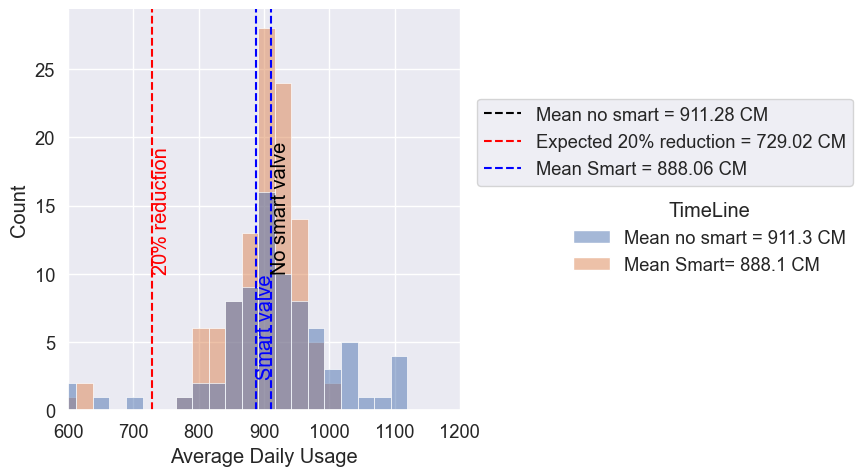

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Create the plot
sns.set_style("white")
sns.set_palette(['#3498db', '#e74c3c'])
sns.set(font_scale=1.2)

plt.figure(figsize=(20, 12))

# Generate the displot and get the legend object
displot = sns.displot(df, x='Average Daily Usage', hue='TimeLine')
legend = displot._legend

# Calculate the values for the vertical lines
no_smart_average = df.loc[df['TimeLine'] == 'No Smart Valve', 'Average Daily Usage'].mean()
line_position_1 = no_smart_average * 0.80
line_position_2 = no_smart_average
line_position_3 = smart_average


smart_average = df.loc[df['TimeLine'] == 'Smart Valve', 'Average Daily Usage'].mean()


# Add the vertical lines
plt.axvline(line_position_1, color='red', linestyle='--', label=f'20% reduction')
plt.axvline(line_position_2, color='blue', linestyle='--', label=f'Mean no smart {no_smart_average:.2f}')
plt.axvline(line_position_3, color='blue', linestyle='--', label=f'Mean Smart {smart_average:.2f}')

# Create custom legend handles for bars and lines
bar_legend = Line2D([], [], color='black', linestyle='--', label=f'Mean no smart = {no_smart_average:.2f} CM')
line_legend = Line2D([], [], color='red', linestyle='--', label=f'Expected 20% reduction = {no_smart_average*.8:.2f} CM')
line_legend_2 = Line2D([], [], color='blue', linestyle='--', label=f'Mean Smart = {smart_average:.2f} CM')

# Add comments or annotations
plt.text(line_position_1, 10, '20% reduction', rotation=90, va='bottom', color='red')
plt.text(line_position_2, 10, 'No smart valve', rotation=90, va='bottom', color='black')
plt.text(line_position_3, 10, 'Smart valve', rotation=90, va='top', color='blue')


plt.xlim(600, 1200)

# Update the legend text
legend.texts[0].set_text(f'Mean no smart = {no_smart_average:.1f} CM')  # Update the text of the first legend item
legend.texts[1].set_text(f'Mean Smart= {smart_average:.1f} CM')  # Update the text of the second legend item


# Add separate legends for bars and lines
plt.legend(handles=[bar_legend, line_legend, line_legend_2], bbox_to_anchor=(1.02, 0.8), loc='best')

# Display the plot
plt.show()


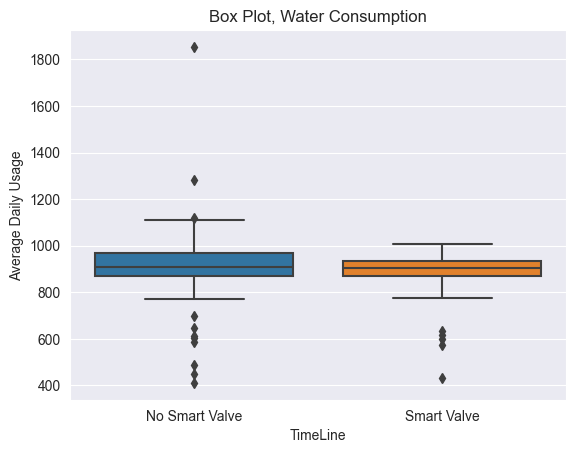

In [8]:
sns.boxplot(x = 'TimeLine', y = 'Average Daily Usage', data = df)
plt.title("Box Plot, Water Consumption")
plt.show();

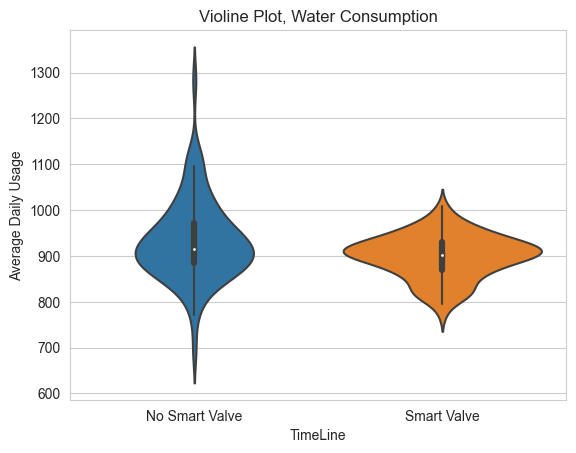

In [79]:
sns.violinplot(x = 'TimeLine', y = 'Average Daily Usage', data = df)
plt.title("Violine Plot, Water Consumption")
plt.show();

## TTEST

In [28]:
rng = np.random.default_rng()
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
stats.ttest_ind(rvs1, rvs2)
stats.ttest_ind(rvs1, rvs2, equal_var=False)

Ttest_indResult(statistic=0.022037933076805908, pvalue=0.9824221019168728)

In [74]:
from statsmodels.stats.weightstats import ttest_ind

ttest_ind(no_smart_valve, smart_valve)

(3.2237125803766618, 0.001508205520410917, 176.0)

In [72]:
no_smart_valve = df[df['TimeLine'] == 'No Smart Valve']['Average Daily Usage']
smart_valve = df[df['TimeLine'] == 'Smart Valve']['Average Daily Usage']

ttest_ind(no_smart_valve, smart_valve, equal_var=True)



Ttest_indResult(statistic=3.2237125803766618, pvalue=0.001508205520410917)

In [71]:
stats.shapiro(no_smart_valve)

stats.levene(no_smart_valve, smart_valve)

LeveneResult(statistic=13.680920214248294, pvalue=0.00028935211812351904)

In [63]:
smart_valve['Average Daily Usage']

78     902
79     830
80     902
81     891
82     908
      ... 
173    940
174    914
175    918
176    938
177    960
Name: Average Daily Usage, Length: 100, dtype: int64

In [1]:
import adal
import requests
import json

# Set up the authentication context
authority_url = 'https://login.microsoftonline.com/common'
resource_url = 'https://analysis.windows.net/powerbi/api'
client_id = 'b9b8e5dd-d958-477a-81c6-27b3d2d4a3e9'
client_secret = '3a1e0ca1-5265-4b3f-a8c6-f7cc03f6b2dc'
context = adal.AuthenticationContext(authority_url)
token = context.acquire_token_with_client_credentials(resource_url, client_id, client_secret)

# Set up the API endpoint and query parameters
api_url = 'https://app.powerbi.com/datahub/datasets/7b986a7e-0620-4a93-a98f-3ee5098bdef4'
headers = {
    'Authorization': 'Bearer ' + token['accessToken'],
    'Content-Type': 'application/json'
}
params = {
    '$select': 'column1,column2,column3',
    '$top': 100
}

# Send the HTTP request and process the response
response = requests.get(api_url, headers=headers, params=params)
if response.status_code == 200:
    data = json.loads(response.content)
    # Do something with the data
else:
    print('Error: ' + str(response.status_code))


AdalError: Get Token request returned http error: 400 and server response: {"error":"unauthorized_client","error_description":"AADSTS700016: Application with identifier 'b9b8e5dd-d958-477a-81c6-27b3d2d4a3e9' was not found in the directory 'Microsoft Services'. This can happen if the application has not been installed by the administrator of the tenant or consented to by any user in the tenant. You may have sent your authentication request to the wrong tenant.\r\nTrace ID: 16cc4bcc-8877-467b-a4e2-a44e49122500\r\nCorrelation ID: 7b3dc4a5-dfb6-46f8-8cbd-1a740ec9bd2e\r\nTimestamp: 2023-04-21 00:27:52Z","error_codes":[700016],"timestamp":"2023-04-21 00:27:52Z","trace_id":"16cc4bcc-8877-467b-a4e2-a44e49122500","correlation_id":"7b3dc4a5-dfb6-46f8-8cbd-1a740ec9bd2e","error_uri":"https://login.microsoftonline.com/error?code=700016"}

In [6]:
import pyodbc as odbc
import pandas as pd
server = 'cmpcsb01'
database = 'packagingplanner'
username = 'remotequery'
password = "excel"
cnxn = odbc.connect('DRIVER={SQL Server}; SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password,
                    trusted_connection='no'
                    )
cursor = cnxn.cursor()
print(cursor)

query = '''SELECT *
FROM     vwPrepForCutInputPriorities
where productiondate= ?
--GROUP BY MeatItem
'''
meat = pd.read_sql(query, cnxn,
                   params=['20220419']
                )

meat

C:\Users\msmetanin\AppData\Local\Temp\ipykernel_17536\1652875520.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  meat = pd.read_sql(query, cnxn,


,MeatItem,ItemKey,P1,P2,P3,P4,ProductionDate
